# Hotel Cancellations Project
### Context
A significant number of hotel bookings are called-off due to cancellations or no-shows, resulting in lost revenue. Such losses are particularly high on last-minute cancellations. 

The cancellation of bookings results in lost or diminished revenue due to many factors:
* Loss of revenue when the hotel cannot resell the room and the room remains empty.
* Additional costs of paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* General human resources to make arrangements for guests.

## Objective
The hotel guest data will be analyzed to develop a Machine Learning based solution that can help in predicting which booking is likely to be cancelled. The data will be used to find which factors have a high influence on booking cancellations, to build a predictive model that can predict which booking is going to be canceled in advance. As a result this should help in formulating profitable policies for cancellations and refunds.

## Data Dictionary
* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np

from sklearn import metrics

from IPython.display import Image

from sklearn import tree
from os import system

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer, 
    roc_curve, 
    roc_auc_score, 
    precision_recall_curve)

In [2]:
#importing data
hotelData = pd.read_csv("INNHotelsGroup.csv")

In [3]:
#making a copy of original dataset in order to not risk messing the original up
data = hotelData.copy()

# Data Overview

In [4]:
#data summary, shape, etc.
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
#getting an idea of the shape of the dataset - rows and columns
data.shape
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.') #f-string 

There are 36275 rows and 19 columns.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
print("List of column names:", data.columns)

List of column names: Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


### Insights: 
- There are 36275 rows (customer bookings) and 18 columns (variables). 
    - The final column "booking_status" is our dependent (target) variable. 
- Within our dataset, we have 1 "float" type column, 13 "integer" type columns, and 5 "object" type columns.
- There are no missing/null values in our dataset at all.
- There are no duplicate data points in our dataset either. 
- Booking_ID column will be dropped as it is used for identification and should not be included in analysis. 

In [11]:
#dropping "booking_ID" column
data = data.drop(["Booking_ID"], axis=1)

In [12]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


- "Booking_ID" column was successfully dropped

# EDA (Exploratory Data Analysis)
Leading Questions:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [13]:
data.describe().T #T transposes the data (switches default columns and rows)

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Insights:
- This table contains the 5-point summary statistics for each numerical column within the dataset (integer and float types). 
    - Within the table, the following were calculated for each variable: total count of values, the mean (average), standard deviation, the smallest value (min), the 1st/2nd/3rd quantile values, and the largest values (max).
- Many of these calculation do not actually make sense for the variable. For example, arrival_year, arrival_date, and arrival_date are technically numerical variables but the values represent categories. So calculating statistics like averages and quantile do not provide us with any valuable information. 
- repeated_guest is technically numerical but are broken down to 0s and 1s, representing Yes and No.

## Univariate Analysis

In [14]:
#histogram and boxplot function - numerical data

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"purple", 
                       "markeredgecolor":"purple",
                      "markersize":"7"}, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="violet", linestyle="-"
    )  # Add median to the histogram

The function above will be used for analysis of numerical variables: 
- lead_time 
- avg_price_per_room 
- no_of_previous_cancellations 
- no_of_previous_bookings_not_canceled

In [15]:
#labeled barplot function - categorical data

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", 
                       order=data[feature].value_counts().index[:n].sort_values())
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, 
                    xytext=(0, 5), textcoords="offset points")  # annotate the percentage
        plt.xticks(rotation = 60) #rotates the x-axis labels by 60 degrees
    plt.show()  # shows the plot

The function above will be used for analysis of categorical variables: 
- no_of_adults
- no_of_children
- no_of_weekend_nights 
- no_of_week_nights
- type_of_meal_plan
- required_car_parking_space  
- room_type_reserved 
- arrival_month 
- market_segment_type 
- repeated_guest 
- no_of_special_requests
- booking_status (*our dependent variable)

Arrival_year and arrival_date were excluded. 

### lead_time

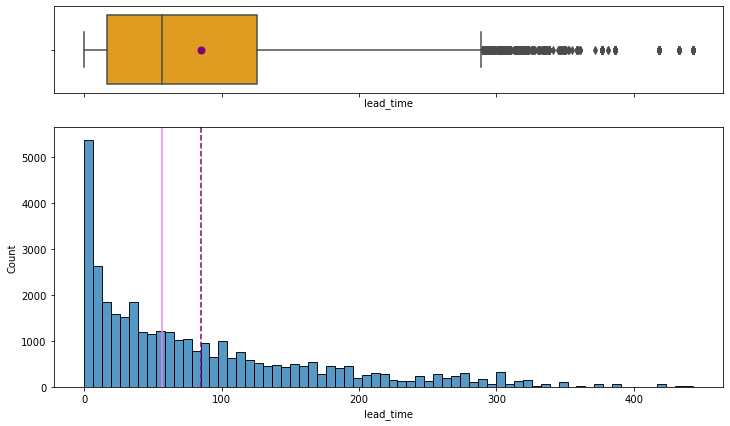

In [16]:
histogram_boxplot(data, "lead_time")

- The distribution of lead_time is very right-skewed. 
- The distribution is influenced by the very high maximum value of 443 days. 
- The average lead time is about 90 days and the median lead time is approximately 50 days. 
- A majority of the overall lead times are under 50 days. 
- There are many outliers flagged by the boxplot, which is expected for data that is very right-skewed. 
- Over 5,000 guests reserved their room the day of their stay. 

### avg_price_per_room

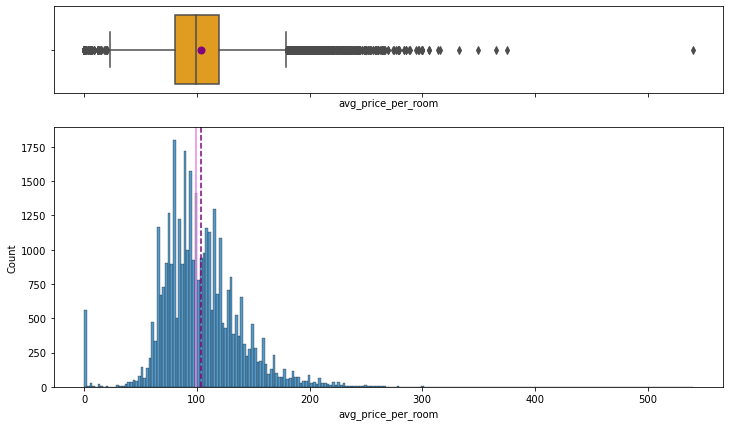

In [17]:
histogram_boxplot(data, "avg_price_per_room")

- The distribution of average prices per room is slightly right-skewed. 
- The median and average of the average prices both sit at approximately 100 euros. 
- There are many outliers flagged by the boxplot. The one outlier that is concerning though is the maximum value of 540 euros. This price is not typical for the data and is an obvious outlier. 

### no_of_previous_cancellations

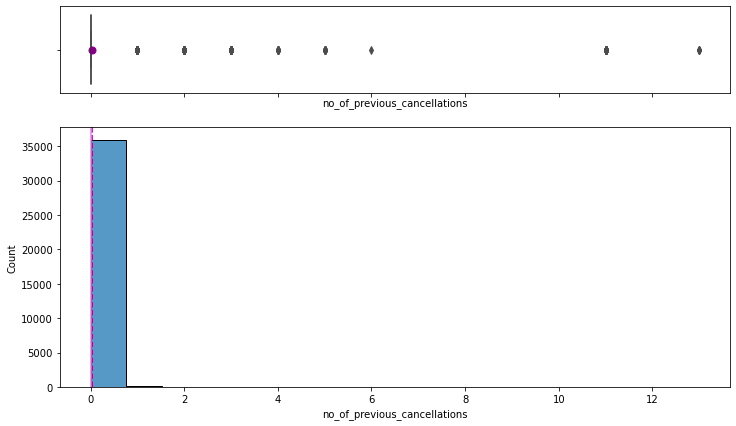

In [18]:
histogram_boxplot(data, "no_of_previous_cancellations")

Observations:
- The number of previous cancellations seen ranges from 0 to approximately 13 and is heavily right-skewed.
- The distribution here is heavily influenced by the large outlier values like 11 and 13. 
- The vast majority of customers have 0 previous cancellations. A few customers have 1 previous cancellation. 
- The average and median number of cancellation are both just barely greater than 0. 

### no_of_previous_bookings_not_canceled

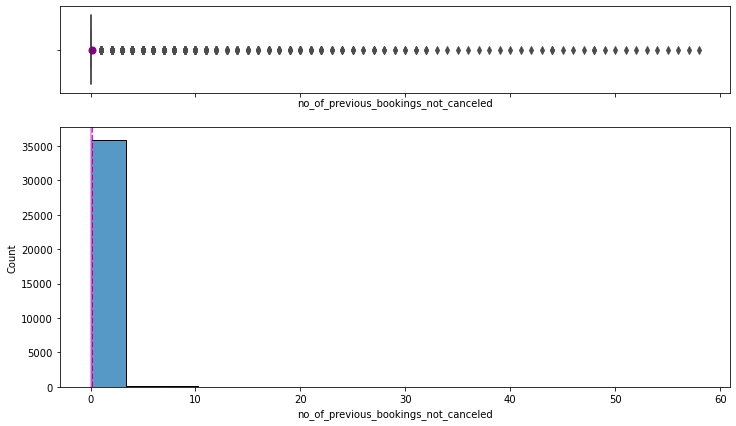

In [19]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

Observations:
- The number of previous bookings that were not cancelled also ranges from 0 to approximately 60 and is heavily right-skewed.
- The distribution here is heavily influenced by the high range of values. 
- The vast majority of customers have 0 previous bookings that were not cancelled. A few customers have less than 10 previous bookings that they did not cancel. 
- The average and median number of non-cancelled bookings are both just barely greater than 0. 
- Overall, most customers have had zero or very few previous cancellations. 

### no_of_adults

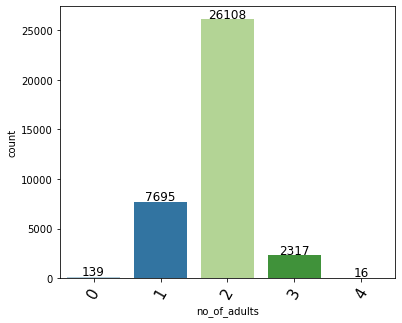

In [20]:
labeled_barplot(data, "no_of_adults")

- A majority of groups that stay at the hotel are comprised of 2 adults. 
- The maximum number of adults in a group that the hotel sees is 4 adults with 16 bookings. 
- There are 139 instances where 0 adults were on the booking. 

### no_of_children

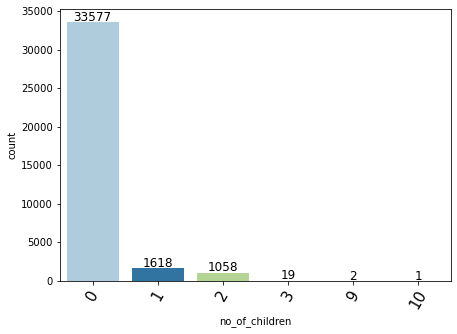

In [21]:
labeled_barplot(data, "no_of_children")

- A majority of bookings comprise of 0 children. 
- If there are any children present, it is most common to have between 1-2 children staying at the hotel in a room. 
- There were a few bookings with 3+ children, with 1 booking including 10 children!

### no_of_weekend_nights

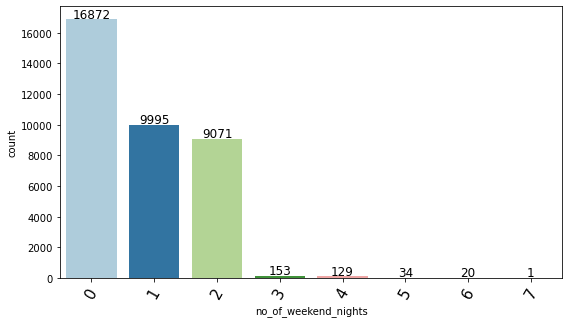

In [22]:
labeled_barplot(data, "no_of_weekend_nights")

- Interestingly, the majority of patrons stay for 0 weekend nights (Saturdays and Sundays) and are exclusively staying during the week. 
    - Of the 36275 total bookings, 47% stay exclusively during the week. 
- There are many bookings (9995 total) that are booked for 1 weekend night, a Saturday or Sunday. There are a comparable amount of bookings (9071) that are booked for both weekend nights. 
- The maximum number of weekend nights that was seen was 7. 

### no_of_week_nights

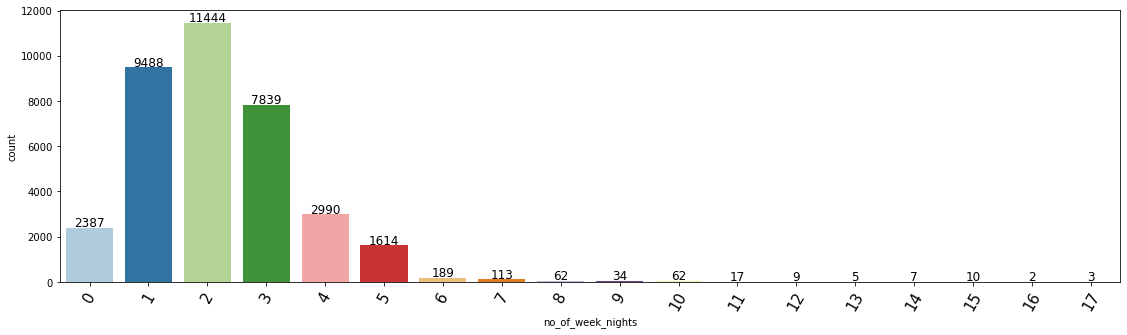

In [23]:
labeled_barplot(data, "no_of_week_nights")

- A majority of bookings included between 1-4 week nights (Mondays-Fridays). 
- A few rooms (2387) were only booked for weekend nights exclusively. 
- The maximum number of week nights that were booked was 17, which interestingly occurred multiple times (3 to be exact). 

### type_of_meal_plan

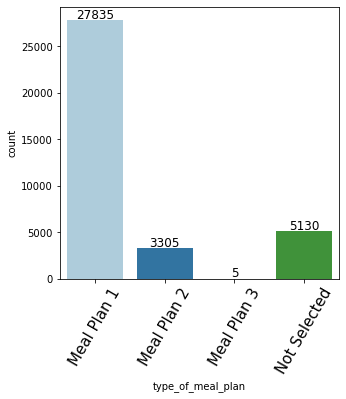

In [24]:
labeled_barplot(data, "type_of_meal_plan")

- Most customers staying at the hotel opted for Meal Plan 1. 
- Meal Plan 3 was only chosen 5 times. 
- Many customers (5130) did not choose a Meal Plan at all while staying at the hotel. 

### required_car_parking_space

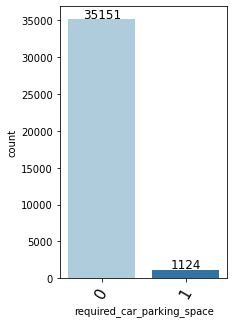

In [25]:
labeled_barplot(data, "required_car_parking_space")

- Over 90% of bookings did not require a parking space. Only 1124 bookings needed a parking space. 

### room_type_reserved

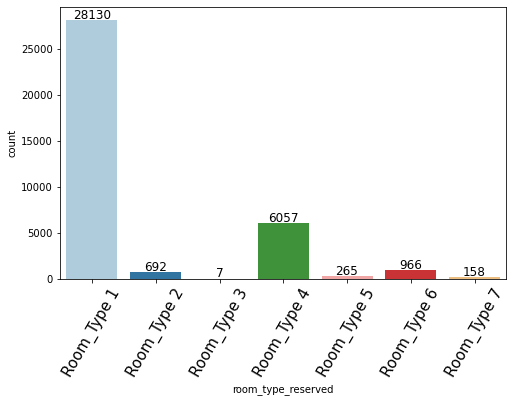

In [26]:
labeled_barplot(data, "room_type_reserved")

- A majority of bookings (28,130) were for Room_Type1. 
- The next most popular room type was #4 with 6057 bookings, then #6 with 966 bookings. 
- Room_Type3 was the least popular room type choice with only 7 bookings. 

### arrival_month

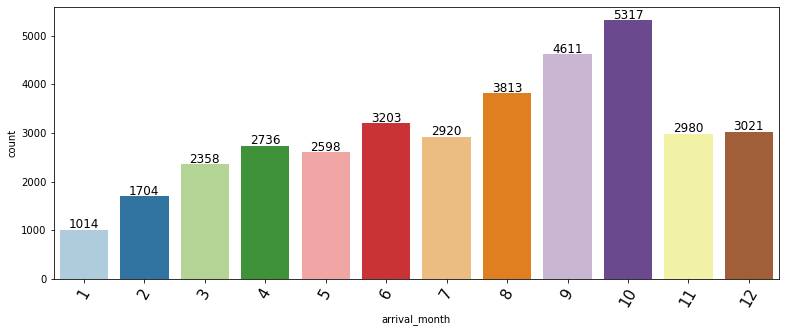

In [27]:
labeled_barplot(data, "arrival_month")

Year and date not included in univariate analysis as they do not provide any useful information. 
- The most popular month that saw the most bookings was November with 5317 bookings. 
- This was followed by September, August, and July. 
- The least popular month for bookings was January, with only 1014 bookings. 

<b>Leading Question 1: What are the busiest months in the hotel? </b>

- The busiest month in the hotel is Novemeber. This is closely followed by September, August, and July. It seems like the late summer is the most popular month for travel in the area.  

### market_segment_type

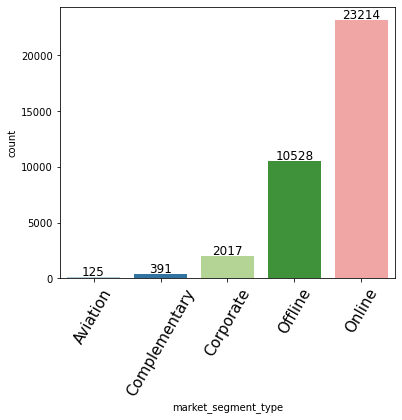

In [28]:
labeled_barplot(data, "market_segment_type")

- The most common market segment type was Online with 23214 instances. 
- The next most common type seen was Offline with 10528 instances, followed by Corporate with 2017. 
- 319 bookings were complementary.

<b>Leading Question 2: Which market segment do most of the guests come from? </b>

- Most of the guests come from the Online segment. The next most popular segment is Offline. 
- The least amount of guests come from the Aviation segment. 

### repeated_guest

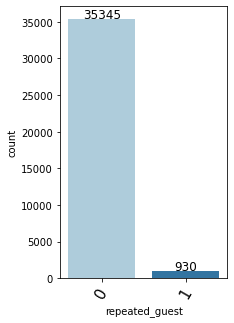

In [29]:
labeled_barplot(data, "repeated_guest")

- The majority of bookings seen were first time guests with 0 previous bookings. This made up 35,345 bookings while repeat guests only made up 930 of the instances. 

### no_of_special_requests

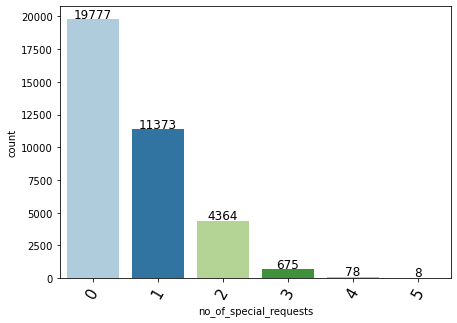

In [30]:
labeled_barplot(data, "no_of_special_requests")

- The majority of customers (19777) did not have any special requests. 
- If customers had any special requests, they mostly only had between 1-3. 
- A few customers (78) had 4 special requests while 8 guests had 5 requests. 

### booking_status

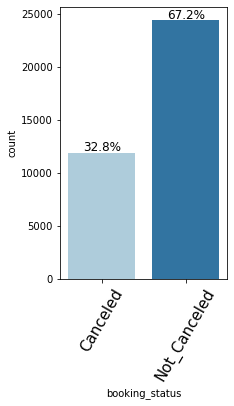

In [31]:
labeled_barplot(data, "booking_status", perc=True)

- Most bookings are not cancelled. 
- About 2/3 of bookings are not cancelled but 1/3 are cancelled. This makes up a significant portion of bookings where revenue is at risk of being lost. 

<b>Leading Question 4: What percentage of bookings are canceled? </b>
- 32.8% of bookings are cancelled. 

## Bivariate Analysis

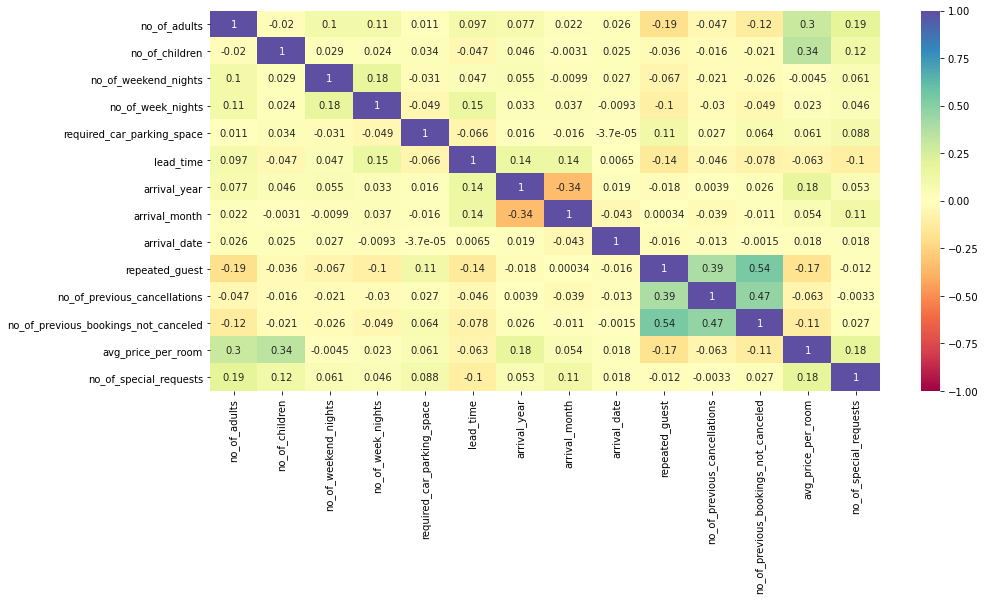

In [32]:
#correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- There is no significant cases of high correlation noted among variables observed. 
- The only correlation that may be of interest includes no_of_bookings_not_cancelled and repeated_guest (with a 0.54 correlation factor), indicating that repeat guests may not be as likely to cancel bookings. This may be revisted later. 

In [33]:
#stacked barplot function - categorical data vs dependent variable

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

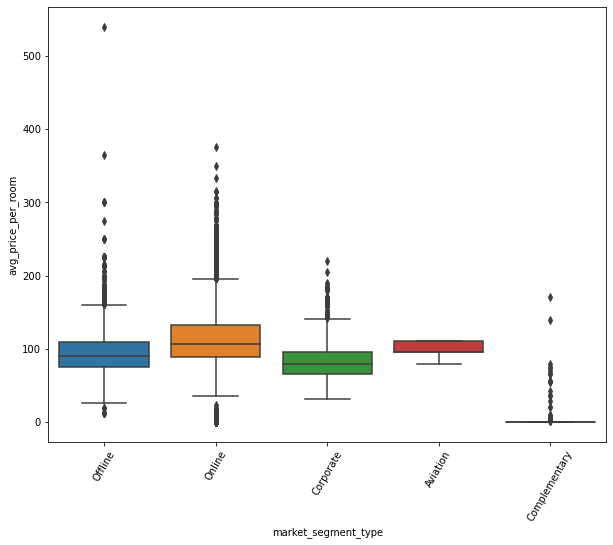

In [34]:
#market_segment_type vs avg_price_per_room
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.xticks(rotation=60)
plt.show()

<b>Leading Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments? </b>
- Offline customers do not have the highest average of the average prices. This belongs to Online customers. However, Offline customers do have the highest average price per room observed. Essentially, the highest price per room is seen in Offline customers even though Online customers have a higher overall average of the averages. 
- Offline, Online, Coporate, and Aviation customers have very similar and comparable average of averages prices. The outliers are very influential between the groups overall. 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


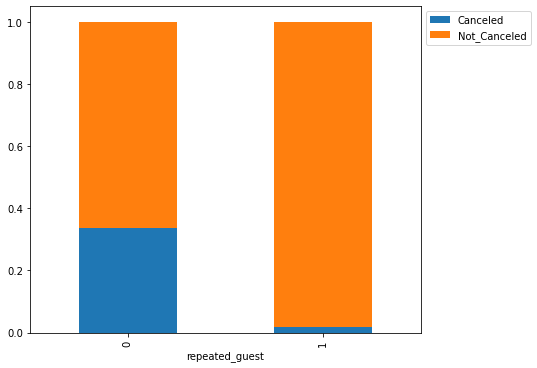

In [35]:
# stacked barplot to observe the spread between guests that are repeat guests and if they have cancelled or not
stacked_barplot(data, "repeated_guest", "booking_status")

- Most guests that cancel their reservations are not repeat guests. 
- Of the repeat guests, a small portion were seen to cancel their reservation. A separate dataframe will be made to observe the spread of if just the repeat guests cancelled or not. 

In [36]:
#creating a new dataframe of only repeat guests

repeat_guests = data[data["repeated_guest"]==1]
cancelled_repeats = repeat_guests[["repeated_guest","booking_status"]]

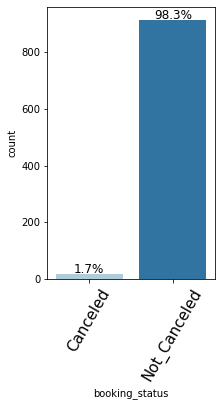

In [37]:
labeled_barplot(cancelled_repeats, "booking_status", perc=True)

<b>Leading Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel? </b>
- Of the guests that were repeat visitors, 98.3% did not cancel their reservations. 
- 1.7% of repeat guests cancelled their reservations. 

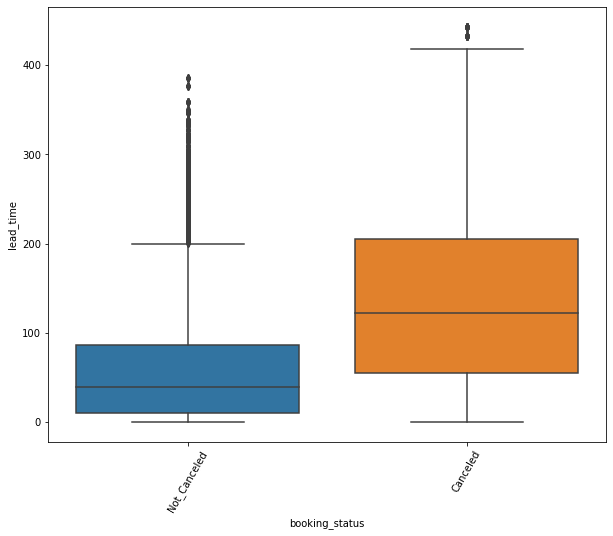

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.xticks(rotation=60)
plt.show()

- The average lead time for customers that have cancelled (1) is higher than for customers that did not cancel their reservation. 
- Overall, the reservations that were cancelled tended to have the longer lead times. 
    - Customers did not cancel the room that were booked on short notice as often. 

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


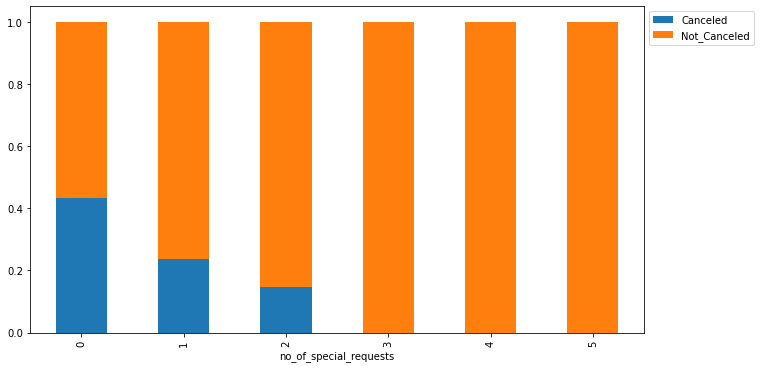

In [39]:
# stacked barplot to observe the number of special requests and booking status
stacked_barplot(data, "no_of_special_requests", "booking_status")

- When comparing the cancellation status vs number of special requests, we can see that the guests with the most number of special requests (3-5) were not seen to cancel their reservations at all. 
- All of the guests that cancelled their reservations had between 0-2 special requests. 
- The majority of guests that cancelled their reservation had 0 special requests included in their booking. 

<b>Leading Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?</b>
- Based on these observations, as number of special requests increases, the less often guests are to cancel their reservation. Therefore, it seem as though most people that require multiple special requirements will not cancel their reservation. 
- Guests with no special requirements are seen to cancel their reservation the most often. 

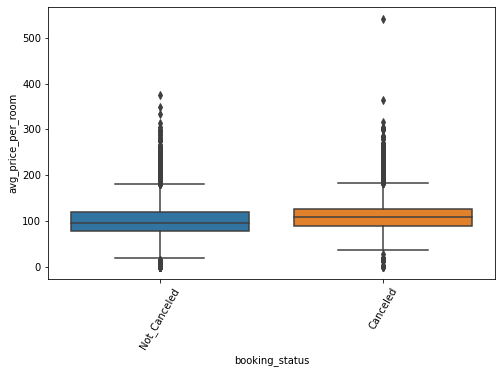

In [40]:
#average price per room vs booking status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking_status", y="avg_price_per_room")
plt.xticks(rotation=60)
plt.show()

- The average room prices are seen to be slightly higher for customers that have cancelled their reservation. 
- Room prices are lower among non-cancellers. 

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


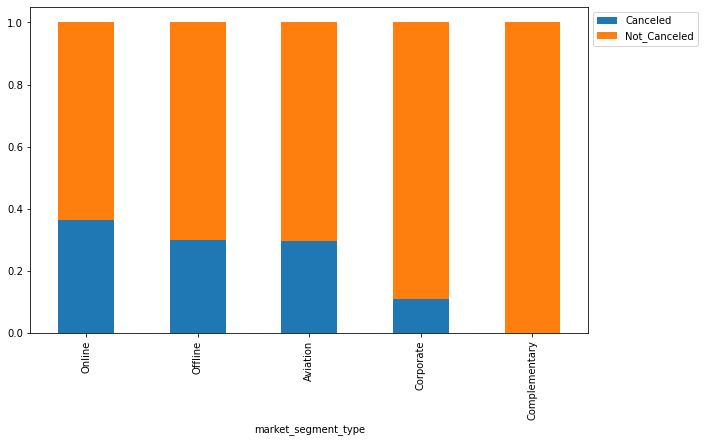

In [41]:
# stacked barplot to observe the market_segment_type and booking status
stacked_barplot(data, "market_segment_type", "booking_status")

- Cancellations are the most common in online bookings. 
- Complementary bookings have the lowest cancellation rate, followed by customers in the corporate market. 

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


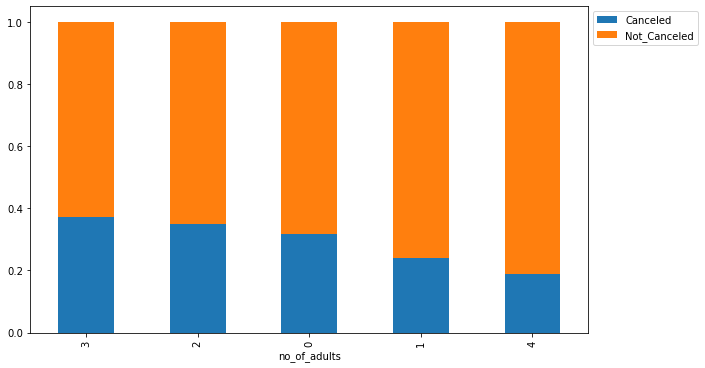

In [42]:
# stacked barplot to observe the no_of_adults and booking status
stacked_barplot(data, "no_of_adults", "booking_status")

- Reservations with 3 adults were seen to cancel moer than bookings with 0-3. 
- Reservations with 4 adults had the lowest cancellation rates. 

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


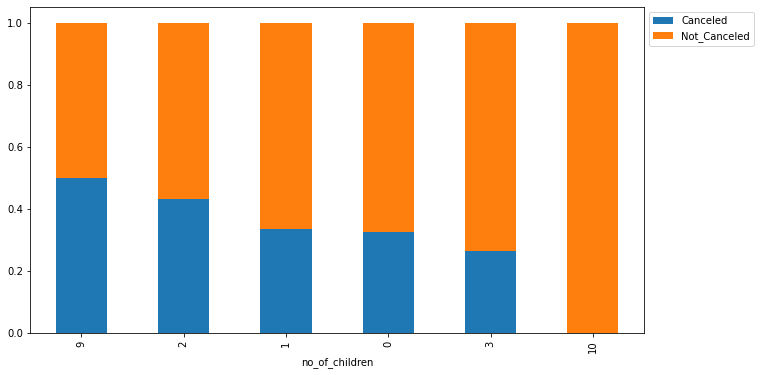

In [43]:
# stacked barplot to observe the no_of_children and booking status
stacked_barplot(data, "no_of_children", "booking_status")

- As the number of children on the booking increases, the cancellation rate also increases. Reservations with 2 children cancel more often than reservations with 1 child. The exception to this is the reservations with 10 children, who were not seen to cancel. 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


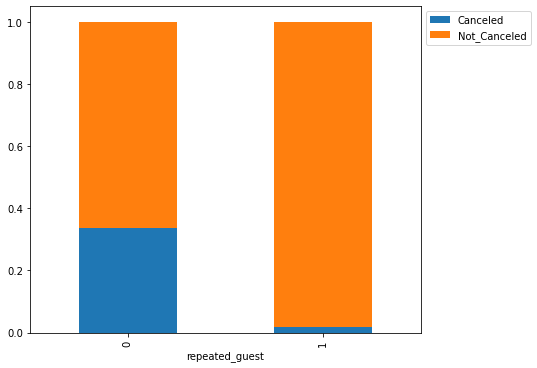

In [44]:
# stacked barplot to observe the no_of_children and booking status
stacked_barplot(data, "repeated_guest", "booking_status")

In [45]:
#creating a new dataframe that adds a columns of total number of nights a reservation has
data_with_total_nights = data.copy()
data_with_total_nights["total_nights"] = data_with_total_nights["no_of_week_nights"] + data_with_total_nights["no_of_weekend_nights"]
data_with_total_nights.head() #shows that the last column "total_nights" was added

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


booking_status  Canceled  Not_Canceled    All
total_nights                                 
All                11885         24390  36275
3                   3586          6466  10052
2                   2899          5573   8472
4                   1941          3952   5893
1                   1466          5138   6604
5                    823          1766   2589
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
16                     5             1      6
19                     5             1      6
17                     4          

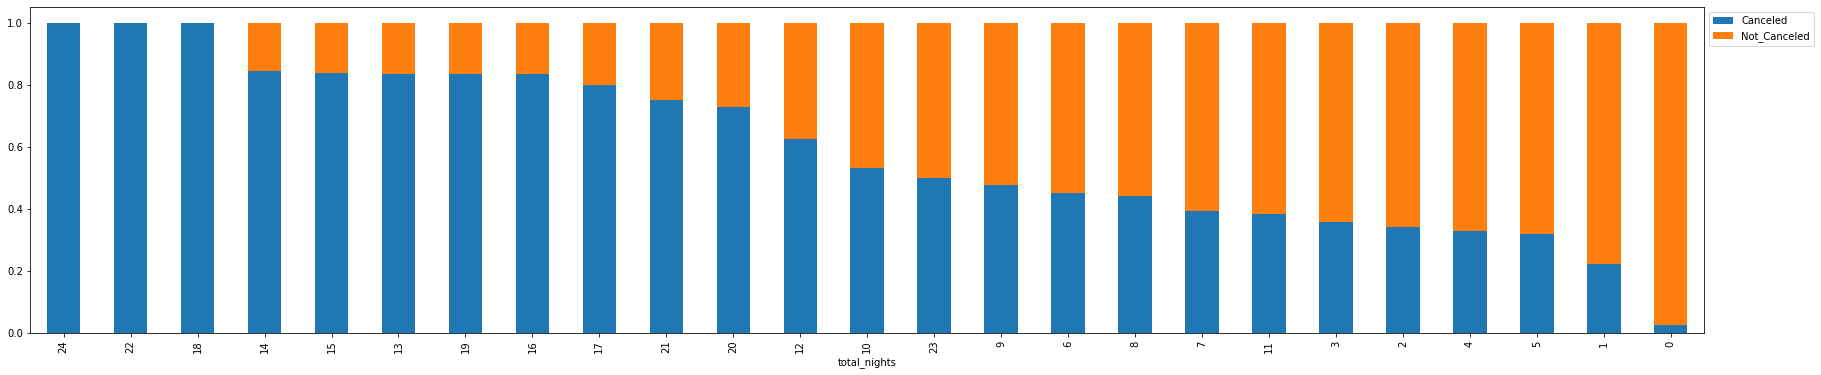

In [46]:
stacked_barplot(data_with_total_nights, "total_nights", "booking_status")

- Reservations that the longer in length have the highest cancellation rates. 
- Reservations that are booked for 0-5 nights have the lowest cancellation rates. 

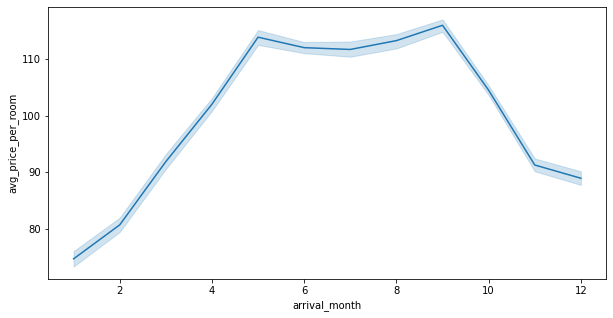

In [47]:
## Complete the code to create lineplot between average price per room and arrival month
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, 
             x = "arrival_month", y = "avg_price_per_room")
plt.show()

- The average room prices are the lowest in the first half of the year. This aligns nicely with the months that the hotel is the busiest. 
- August-September are the most popular months of the year and they are subsequently also the months with the highest room rates. 

# Data Preprocessing

### Missing Value Treatment

In [48]:
#counting the number of missing values in each column again
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [49]:
#counting up the number of missing values per row
data.isnull().sum(axis=1).value_counts()

0    36275
dtype: int64

- There are 0 missing values within the columns.
- All 36275 rows have 0 missing values. 
- No missing value treatments are required here. 

### Outlier Detection and Treatment

In [50]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

#dropping arrival_year, arrival_month, and arrival_date as they are all temporal variables
numerical_columns.remove("arrival_year")
numerical_columns.remove("arrival_month") 
numerical_columns.remove("arrival_date")

print(numerical_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [51]:
#creating a new dataframe with just the numerical variables
num_columns_df = data.copy()
num_columns_df = num_columns_df.select_dtypes(include=np.number)

#removing the three temporal variables
num_columns_df = num_columns_df.drop(["arrival_year", "arrival_month", "arrival_date"], axis=1)

num_columns_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,0,0,0,65.00,0
1,2,0,2,3,0,5,0,0,0,106.68,1
2,1,0,2,1,0,1,0,0,0,60.00,0
3,2,0,0,2,0,211,0,0,0,100.00,0
4,2,0,1,1,0,48,0,0,0,94.50,0


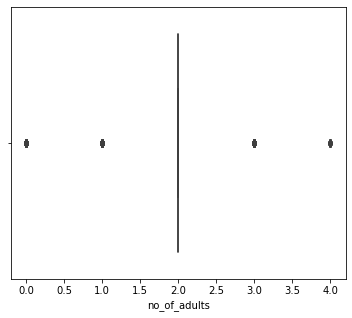

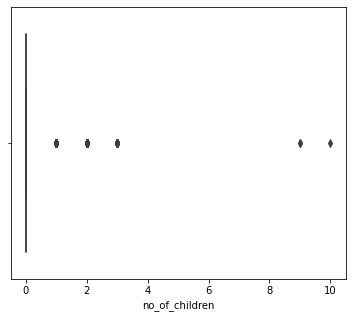

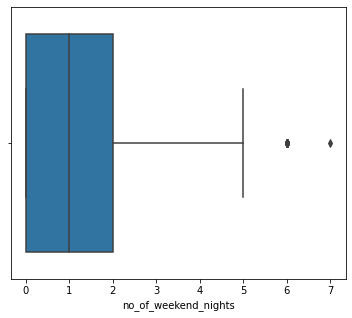

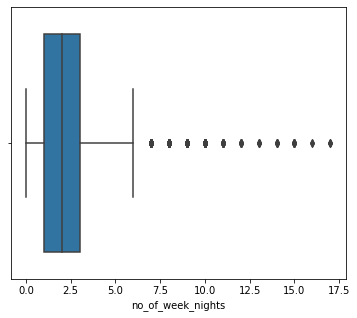

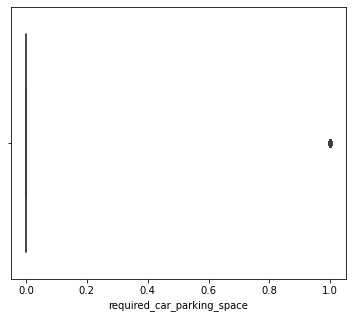

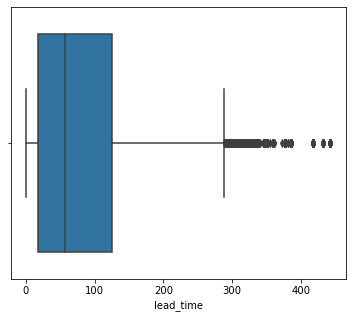

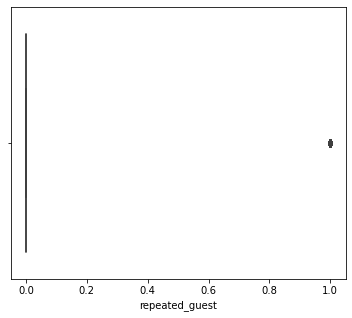

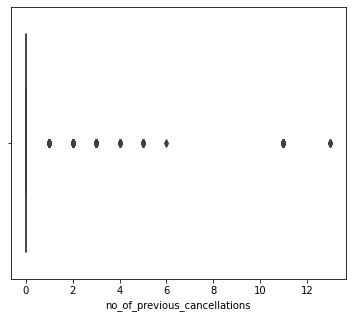

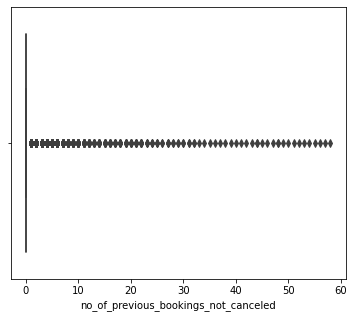

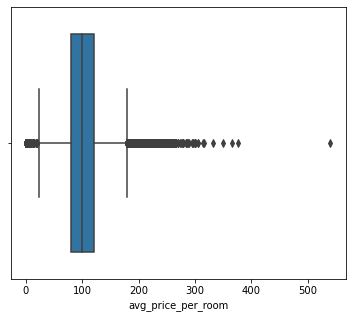

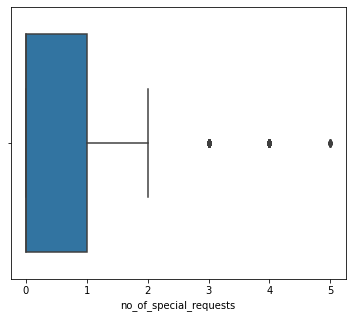

In [52]:
#function to create boxplots of each numerical column:
for column in num_columns_df:
    plt.figure(figsize=(6,5))
    sns.boxplot(data=num_columns_df, x=column)

- Many of the numerical columns have multiple outliers that are flagged by the boxplots. Within the histograms for these variables (produced earlier), we can see that these outliers really are not inconsisent with the overall distribution of the data and are not of any concern.
- Most of these columns are independent variables and have ordinal, discrete values. So, even though many values are detected as outliers, we can use them as is and not fix them in any way.
- The outlier that we really need to analyze is that of the "avg_price_per_room" variable.
    - This will be looked into below. 

In [53]:
#finding the value of the large value in the avg_price_per_room variable
print(max(data["avg_price_per_room"]))

540.0


In [54]:
#investigating the guest booking with this room price
#transposed using .T to make it easier to read
data[data["avg_price_per_room"] == max(data["avg_price_per_room"])].T

,33114
no_of_adults,2
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,1
type_of_meal_plan,Meal Plan 1
required_car_parking_space,0
room_type_reserved,Room_Type 1
lead_time,35
arrival_year,2018
arrival_month,3


- The average price per room the day of this booking was significantly higher than "normal". According to the boxplot above, the normal average price per room is around 100 euros. 
- Interestingly, this customer ended up cancelling their reservation. This indicates that it is likely that this value of 540 euros is not an error. It is also likely that the super high dynamic pricing was probably the reason the customer ended up cancelling their reservation. 

Overall: 
- The outliers from the numerical variables do not seem to be problematic. Therefore, they will not be treated or dropped. We will just stick to the original variables.

### Data Prep for Modeling
- Encoding categorical variables - deciding which variables will need dummy variables. 

In [55]:
#checking the data types to determine which columns hold categorical variables
data.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

- dummy variables will be created for the object variables. 

In [56]:
categorical_columns = data.select_dtypes(include = ["object"]).columns.tolist()
print("The following columns will need to be converted to dummy variables: ", categorical_columns)

The following columns will need to be converted to dummy variables:  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


<b> Booking_status will be encoded to 1 and 0 for "Canceled" and "Not_Canceled", respectively. </b>

In [57]:
#lambda function to encode the booking_status variable
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<b> The arrival time variables are causing some issues. Arrival_date and arrival_year do not provide us with any useful information that can be used moving forward. These 2 variables will be dropped so that they are not mixed into the analysis further. arrival_month will be converted to a categorical variable since the integer values represent months and should not be used as numerical values for calculations. </b>

In [58]:
#dropping date and year
data = data.drop(["arrival_date"], axis=1)
data = data.drop(["arrival_year"], axis=1)

In [59]:
#switching arrival_month to a category type
data["arrival_month"] = data["arrival_month"].astype("category")

### Defining the dependent and independent (target) variables

In [60]:
X = data.drop(["booking_status"], axis=1) #independent variables
y = data["booking_status"] #target variable

print(X.head())
print("\n")
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

  arrival_month market_segment_type  repeated_guest  \
0

In [61]:
#dummy variable conversion
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
#y = pd.get_dummies(y, drop_first=True)

print(X.shape)
X.head()

(36275, 35)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,arrival_month_10,arrival_month_11,arrival_month_12,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,0,2,3,0,5,0,0,0,106.68,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,2,1,0,1,0,0,0,60.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,0,0,0,94.50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
#adding constant to X
X = add_constant(X)

- Dummy variables have been successfully produced for the categorical variables (in this dataset, the only categorical variable types were "object" and "category" type variables). 

### Splitting into train and test data

In [63]:
#splitting data with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

(25392, 36) (10883, 36)
Number of rows in train data = 25392
Number of rows in test data = 10883


- The data was successfully split into the training group and testing group. 
- The training data has 25392 rows (bookings) with 27 columns (variables). 
- The testing data has 10883 rows, also with 27 variables. 

In [64]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


- The percentage of Not_Canceled and Canceled reservations (our target variable) is consistent between the 2 groups. 

# Building a Logistic Regression model

### Model Evaluation Criterion
<b>Incorrect predictions are: </b>
1. Predicting that a customer will not cancel their booking but actually does cancel. - False negative
2. Predicting that a customer will cancel their booking but does not end up cancelling. - False positive

<b>Which case is more important? </b>
- The first prediction type is more costly for the hotel. 
- The second prediction type is bad mainly for brand reputation. It would be a negative experience if the hotel treats a customer as if they assume they are going to cancel their reservation. 

<b>How to reduce this loss? </b>
- The hotel would want to maximize the F1 score.
    - As F1 score increases, the likelihood of false negatives and false positives decreases. 

<b>Functions to calculate different metrics and confusion matrices that can be used repeatedly. </b>
- model_performance_classification_statsmodels function (which will be shortened to mpcsm) - will be used to check the model performance of models as they are made. 
- confusion_matrix_statsmodels (which will be shortened to confusion) will be used to plot the confusion matrices

In [65]:
def mpcsm (model, predictors, target, threshold = 0.5):
    """
    model: classifier
    predictors: independent variables
    target: target variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_temp = model.predict(predictors) > threshold #checks which probabilities are greater than threshold
    pred = np.round(pred_temp) #rounds the above values
    
    #calculating accuracy, recall, precision, and f1 score
    acc = accuracy_score(target,pred) 
    recall = recall_score(target,pred) 
    precision = precision_score(target,pred) 
    f1 = f1_score(target,pred)
    
    #creating a dataframe of the metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0])
    
    #returning the dataframe
    return df_perf

In [66]:
def confusion (model, predictors, target, threshold = 0.5):
    """
    model, predictor, target, and threshold information same as above
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)
    
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = labels, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

- First, the model will be fit on the training set

In [67]:
#fitting model to trianing set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

#printing the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25356
Method:                           MLE   Df Model:                           35
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                  0.1084
Time:                        13:20:04   Log-Likelihood:                -14347.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.1469      0.365    -14.112      0.000      -5.862      -4.432
no_of_adults                             0.1418      

Coefficients: 
- The variables with negative coefficients (required_car_parking_space, repeated_guest, etc.) indicate that the probability of cancellation decreases as these variables increase. 
- Variables with positive coefficients (no_of_adults, no_of_children, etc.) have the opposite effect. As these variables increase, so does the likelihood of cancellation. 

P-values:
- The variables have a range of p-values. These values indicate the variable's significance. With a standard significance level of 0.05 (5%), any variable with a p-value smaller than 0.05 is considered significant. 
- P-values may change as multicollinearity is treated. (will be done below). 

### Checking model performance

In [68]:
#predicting on training set
#default threshold is 0.5 so if the predicted probability is greater than 0.5, the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

In [69]:
#confusion matrix on the training set
mpcsm(lg, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.794266,0.638168,0.708295,0.671405


- The performance metrics of this model show that the training data is being fit relatively well by the model. 

## Checking Multicollinearity
- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.
- Multicollinearity will be tested using VIF (variance inflation factor). 

In [70]:
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
                      index = X_train.columns,
                      dtype = float)

print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   354.130468
no_of_adults                              1.384448
no_of_children                            2.006598
no_of_weekend_nights                      1.074594
no_of_week_nights                         1.104229
required_car_parking_space                1.044559
lead_time                                 1.335064
repeated_guest                            1.784148
no_of_previous_cancellations              1.406225
no_of_previous_bookings_not_canceled      1.651917
avg_price_per_room                        2.310585
no_of_special_requests                    1.250081
type_of_meal_plan_Meal Plan 2             1.227126
type_of_meal_plan_Meal Plan 3             1.025508
type_of_meal_plan_Not Selected            1.240548
room_type_reserved_Room_Type 2            1.102402
room_type_reserved_Room_Type 3            1.003609
room_type_reserved_Room_Type 4            1.366620
room_type_reserved_Room_Type 5            1.028

- The VIFs for every feature is well below 10. This indicates that the regression coefficients are not poorly estimated due to any multicollinearity that may be present. 
- None of the variables will need to be treated or dropped due to multicollinearity. 
- There is no obvious multicollinearity present and assumption is met. 

### Dropping high p-value variables
- Variables with p-values that are greater than 0.05 do not significantly impact the target variable and will be dropped. 
- Because p-values for other variables sometimes change after a variable is dropped, the variables with high p-values will not all be dropped at once. 
- A function utilizing a while loop will be used to build model, check the p-values of the variables, drop the column with the highest p-value, then repeat the whole process until there are no more columns with p-values > 0.05.

In [71]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25356
Method:                           MLE   Df Model:                           35
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                  0.1084
Time:                        13:20:30   Log-Likelihood:                -14347.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.1469      0.365    -14.112      0.000      -5.862      -4.432
no_of_adults                             0.1418      

- variables with high initial p-values: no_of_previous_bookings_not_canceled, type_of_meal_plan_Meal Plan 2, room_type_reserved_Room_Type 3, and market_segment_type_Online. 

In [72]:
#initial list of columns
cols = X_train.columns.tolist()

#setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #defining the train set
    x_train_aux = X_train[cols]
    
    #fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()
    
    #getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    #name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else: 
        break
        
selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'arrival_month_2', 'arrival_month_3', 'arrival_month_4', 'arrival_month_5', 'arrival_month_6', 'arrival_month_7', 'arrival_month_8', 'arrival_month_9', 'arrival_month_10', 'arrival_month_11', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [73]:
X_train1 = X_train[selected_features]

In [74]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

pred_train1 = lg1.predict(X_train1) > 0.5
pred_train1 = np.round(pred_train1)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                  0.3458
Time:                        13:20:40   Log-Likelihood:                -10527.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.0913      0.137    -37.107      0.000      -5.360      -4.822
no_of_adults                             0.1430      

- Now, no feature has a p-value greater than 0.05. 
- We will now consider the features in X_train1 as the final list and lg1 as the final model. 
- The same features will also be removed from the X_test group. 

In [75]:
X_test1 = X_test[selected_features]

In [76]:
print("Training performance:")
mpcsm(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805923,0.637929,0.737388,0.684062


### Coefficient interpretation
- Many of the variables have positive coefficients. An increase of these variables will lead to an increase in the likelihood that the customer will cancel their reservation. 
    - For example, as the average price per room increases, customers are more likely to cancel their reservations, likely due to finding a better deal elsewhere. 
- Variables with negative coefficients have the opposite association. As these variables increase, the less likely the customer will cancel their reservation. 
    - For example, the higher number of previous bookings the customer had that there not cancelled, the less likely they will cancel this one. 

### Converting coefficients to odds
- The coefficients of the logistic regression model are in terms of log(odd). To find the odds, we will take the exponential of the coefficients. 
    - odds = exp(b)
    - the percent change in odds is given as: odds = (exp(b)-1) * 100

In [77]:
#odds from coefficients
odds = np.exp(lg1.params)

#adding these odds to a dataframe
pd.DataFrame(odds, X_train1.columns, columns=["odds"])

,odds
const,6.149865e-03
no_of_adults,1.153705e+00
no_of_children,1.190783e+00
no_of_weekend_nights,1.128709e+00
no_of_week_nights,1.050827e+00
required_car_parking_space,1.970275e-01
lead_time,1.017052e+00
no_of_previous_bookings_not_canceled,5.585118e-01
avg_price_per_room,1.021414e+00
no_of_special_requests,2.227289e-01


In [78]:
#Percentage in odds (finding the percent change)
#using odds = (exp(b)-1) * 100
perc_change_odds = (np.exp(lg1.params)-1)*100

pd.DataFrame(perc_change_odds, X_train1.columns, columns=["%change_odds"])

,%change_odds
const,-99.385013
no_of_adults,15.370531
no_of_children,19.078252
no_of_weekend_nights,12.870898
no_of_week_nights,5.082693
required_car_parking_space,-80.297254
lead_time,1.705207
no_of_previous_bookings_not_canceled,-44.148820
avg_price_per_room,2.141422
no_of_special_requests,-77.727113


Observations:  
- No_of_children - holding all other features constant, a unit change the number of children will increase the odds of the reservation being cancelled by 19.08%. 
- No_of_previous_bookings_not_cancelled - holding all other features constant, a unit change the number of previous bookings by that customer that were not cancelled will decrease the odds of the reservation being cancelled by 44.15%.
- Guest who do not choose a meal plan are 45.41% more likely to cancel. 
- As the number of special requests increases on the reservation, the odds of the reservation being cancelled decreases by 77.73%. 
- Coportate guests are 55.65% less likely to cancel. 

### Checking model performance on training set

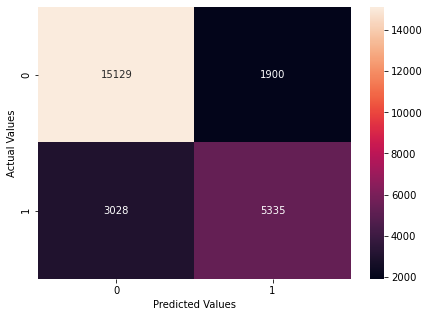

In [79]:
#confusion matrix on training set
cm = confusion_matrix(y_train, pred_train1)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [80]:
print("Training performance: ")
log_reg_model_train_perf = mpcsm(lg1, X_train1, y_train)

log_reg_model_train_perf

Training performance: 


,Accuracy,Recall,Precision,F1
0,0.805923,0.637929,0.737388,0.684062


### ROC - AUC on training set

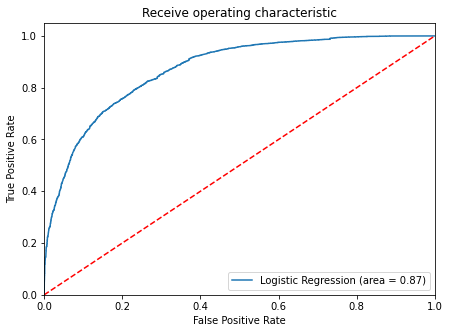

In [81]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)"% logit_roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Model is performing very well on the training set. 

### Model performance improvement
The f1 score and recall score could both be improved. This will be done by changing the model threshold using the AUC-ROC curve. 
- The optimal threshold cutoff would be where tpr is high and fpr is low. 
    - TPR = true positive rate
    - FPR = false positive rate

In [82]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold_auc_roc)

Optimal threshold:  0.3155965441562829


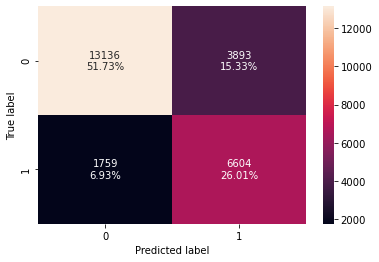

In [83]:
#confusion matrix with new threshold (optimal)
confusion(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [84]:
# checking the performance for this model 
log_reg_model_train_perf_threshold_auc_roc = mpcsm(
    lg1, X_train1, y_train, threshold = optimal_threshold_auc_roc)

print("Training performance: ")
log_reg_model_train_perf_threshold_auc_roc

Training performance: 


,Accuracy,Recall,Precision,F1
0,0.77741,0.789669,0.629132,0.700318


- Accuracy and precision have dropped, recall has increased, and f1 score has just slightly increased. 
- The model is still performing well. 
- We will use the precision-recall curve to see if an even better thershold can be found. 

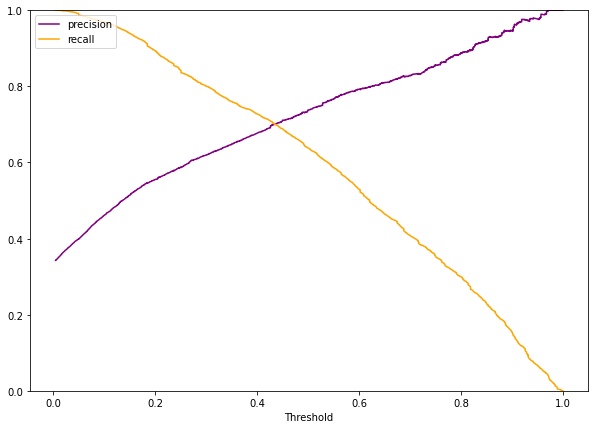

In [85]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores)

#plotting the prescision, recall, and threshold curve
def plot_prec_recall_vs_thresh (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "purple", label="precision") #precision line
    plt.plot(thresholds, recalls[:-1], "orange", label="recall") #recall curve
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plt.figure(figsize=(10,7))
plot_prec_recall_vs_thresh(prec, rec, tre)
plt.show()

- The lines meet at approximately 4.2. So we will use 4.2 as our threshold to get the most balanced recall and precision. 

In [86]:
#setting the new threshold
optimal_threshold_curve = 0.42

### Checking model performance on training set 
- including the new threshold found 

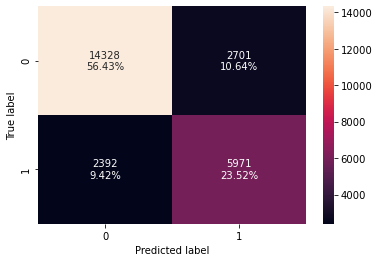

In [87]:
#confusion matrix
confusion(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [88]:
log_reg_model_train_perf_threshold_curve = mpcsm(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

print("Training performance: ")
log_reg_model_train_perf_threshold_curve

Training performance: 


,Accuracy,Recall,Precision,F1
0,0.799425,0.713978,0.688538,0.701027


In [89]:
#training performance comparison - including all of the thresholds

models_train_comp_df = pd.concat([
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        ], axis=1)

models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3168 Threshold",
    "Logistic Regression-0.42 Threshold"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3168 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.805923,0.777410,0.799425
Recall,0.637929,0.789669,0.713978
Precision,0.737388,0.629132,0.688538
F1,0.684062,0.700318,0.701027


F1 score: 
- The original F1 score before altering the threshold was 0.682321 with the default threshold of 0.5. 
- By adjusting the threshold to 0.42, the f1 score slightly increased to 0.696807. 

Accuracy: 
- With the adjusted threshold, accuracy went down from 0.805529 to 0.799543. 

Recall: 
- With the adjusted threshold, precision went up slightly from 0.634103 to 0.694243.

Precision: 
- With the adjusted threshold, precision went down from 0.738477 to 0.694243. 

## Checking model performance on the test set

<b>Using model with default threshold (0.5)</b>

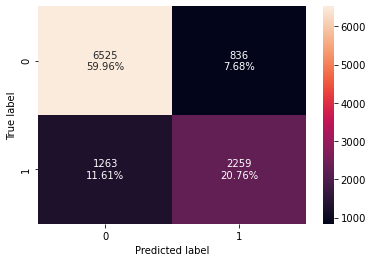

In [90]:
#confusion matrix
confusion(lg1, X_test1, y_test)

In [91]:
log_reg_model_test_perf = mpcsm(lg1, X_test1, y_test)

print("Test Performance: ")
log_reg_model_test_perf

Test Performance: 


,Accuracy,Recall,Precision,F1
0,0.80713,0.641397,0.729887,0.682787


ROC Curve on test set

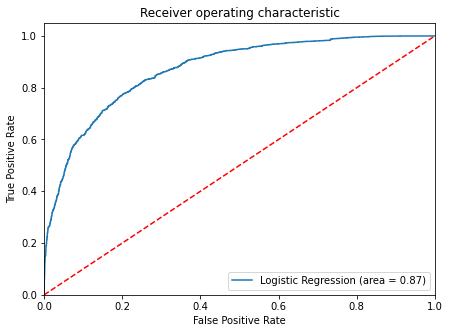

In [92]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

<b>Using model with threshold = 0.3168</b>

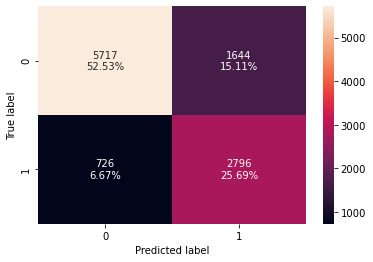

In [93]:
#confusion matrix - threshold 0.3168...
confusion(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [94]:
#model performance - threshold 0.3168...
log_reg_model_test_perf_threshold_auc_roc = mpcsm(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.782229,0.793867,0.62973,0.702336


<b>Using model with threshold = 0.42</b>

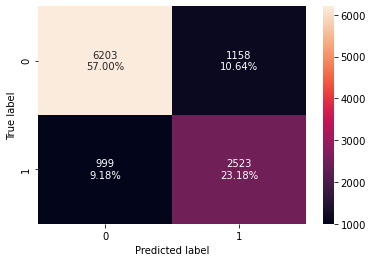

In [95]:
#confusion matrix - threshold 0.42
confusion(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [96]:
log_reg_model_test_perf_threshold_curve = mpcsm(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.801801,0.716354,0.685412,0.700541


<b>Comparing thresholds on testing performance: </b>

In [97]:
# testing performance comparison including all thresholds

models_test_comp_df = pd.concat(
    [log_reg_model_test_perf.T,
    log_reg_model_test_perf_threshold_auc_roc.T,
    log_reg_model_test_perf_threshold_curve.T], 
    axis=1)

models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3168 Threshold",
    "Logistic Regression-0.42 Threshold"]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3168 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.807130,0.782229,0.801801
Recall,0.641397,0.793867,0.716354
Precision,0.729887,0.629730,0.685412
F1,0.682787,0.702336,0.700541


# Final Model Summary

In [98]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                  0.3458
Time:                        13:21:51   Log-Likelihood:                -10527.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.0913      0.137    -37.107      0.000      -5.360      -4.822
no_of_adults                             0.1430      

- Logistic regression model has given a generalized performance on the training and test set.

# Building a Decision Tree model

X and y have already been defined. "booking_status" was dropped from X above and dummies were created for all of the necessary variables. 
- we will be using the original splittings of the groups into test and train groups. 
    - X_test1, X_train1, y_train, and y_test were all included in the logisitc regression model. 
    - We will be using X_test, X_train, y_train, and y_test that were previously defined in our decision tree now since they are no longer being used in the logistic regression model but they still exist in this notebook. 

Two functions will be created first to be used to calculate metrics and confusion matrices. 
- The model_performance_classification_sklearn function (shortened to mpcsl) will be used to check the model performance of models. 
- confusion_dtrees function will be used to plot confusion matrices. 

In [99]:
# defining the sklearn model performance classification function
def mpcsl(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent (target) variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0])

    return df_perf

In [100]:
#building the confusion_dtrees function

def confusion_dtrees (model, predictors, target):
    """
    model, predictors, and target info same as above
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item/cm.flatten().sum())] 
                         for item in cm.flatten()]).reshape(2,2)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building the model
- The model will be built using the DecisionTreeClassifier function. 

In [101]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<b>Checking model performance on training set</b>

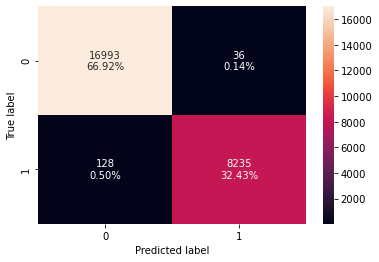

In [102]:
confusion_dtrees(dTree, X_train, y_train)

In [103]:
decision_tree_perf_train = mpcsl(dTree, X_train, y_train)

decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.993541,0.984694,0.995647,0.990141


- As is, the model is able to almost perfectly classify all of the data points on the training set. 
- The model is likely overfit to the training data and will not perform well on the test data. This is because there was no parameters/restrictions applied to the model. Performance on the test set is shown below:

<b>Checking the model performance on the test set</b>

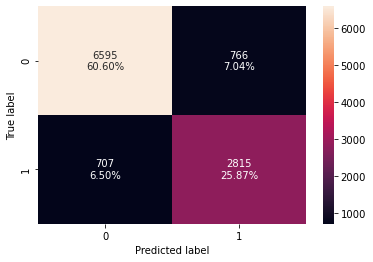

In [104]:
confusion_dtrees(dTree, X_test, y_test)

In [105]:
decision_tree_perf_test = mpcsl(dTree, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.864651,0.799262,0.786093,0.792623


- The model isn't necessarily performing badly on the test set but the f1 scores are not very close when compared to each other. 
- This suggests that the model is too overfit to the training data and should be improved. This will be done by pruning. 

## Visualizing the decision tree model as is without pruning

In [106]:
#creating a list of column names
feature_names = X_train.columns.to_list()

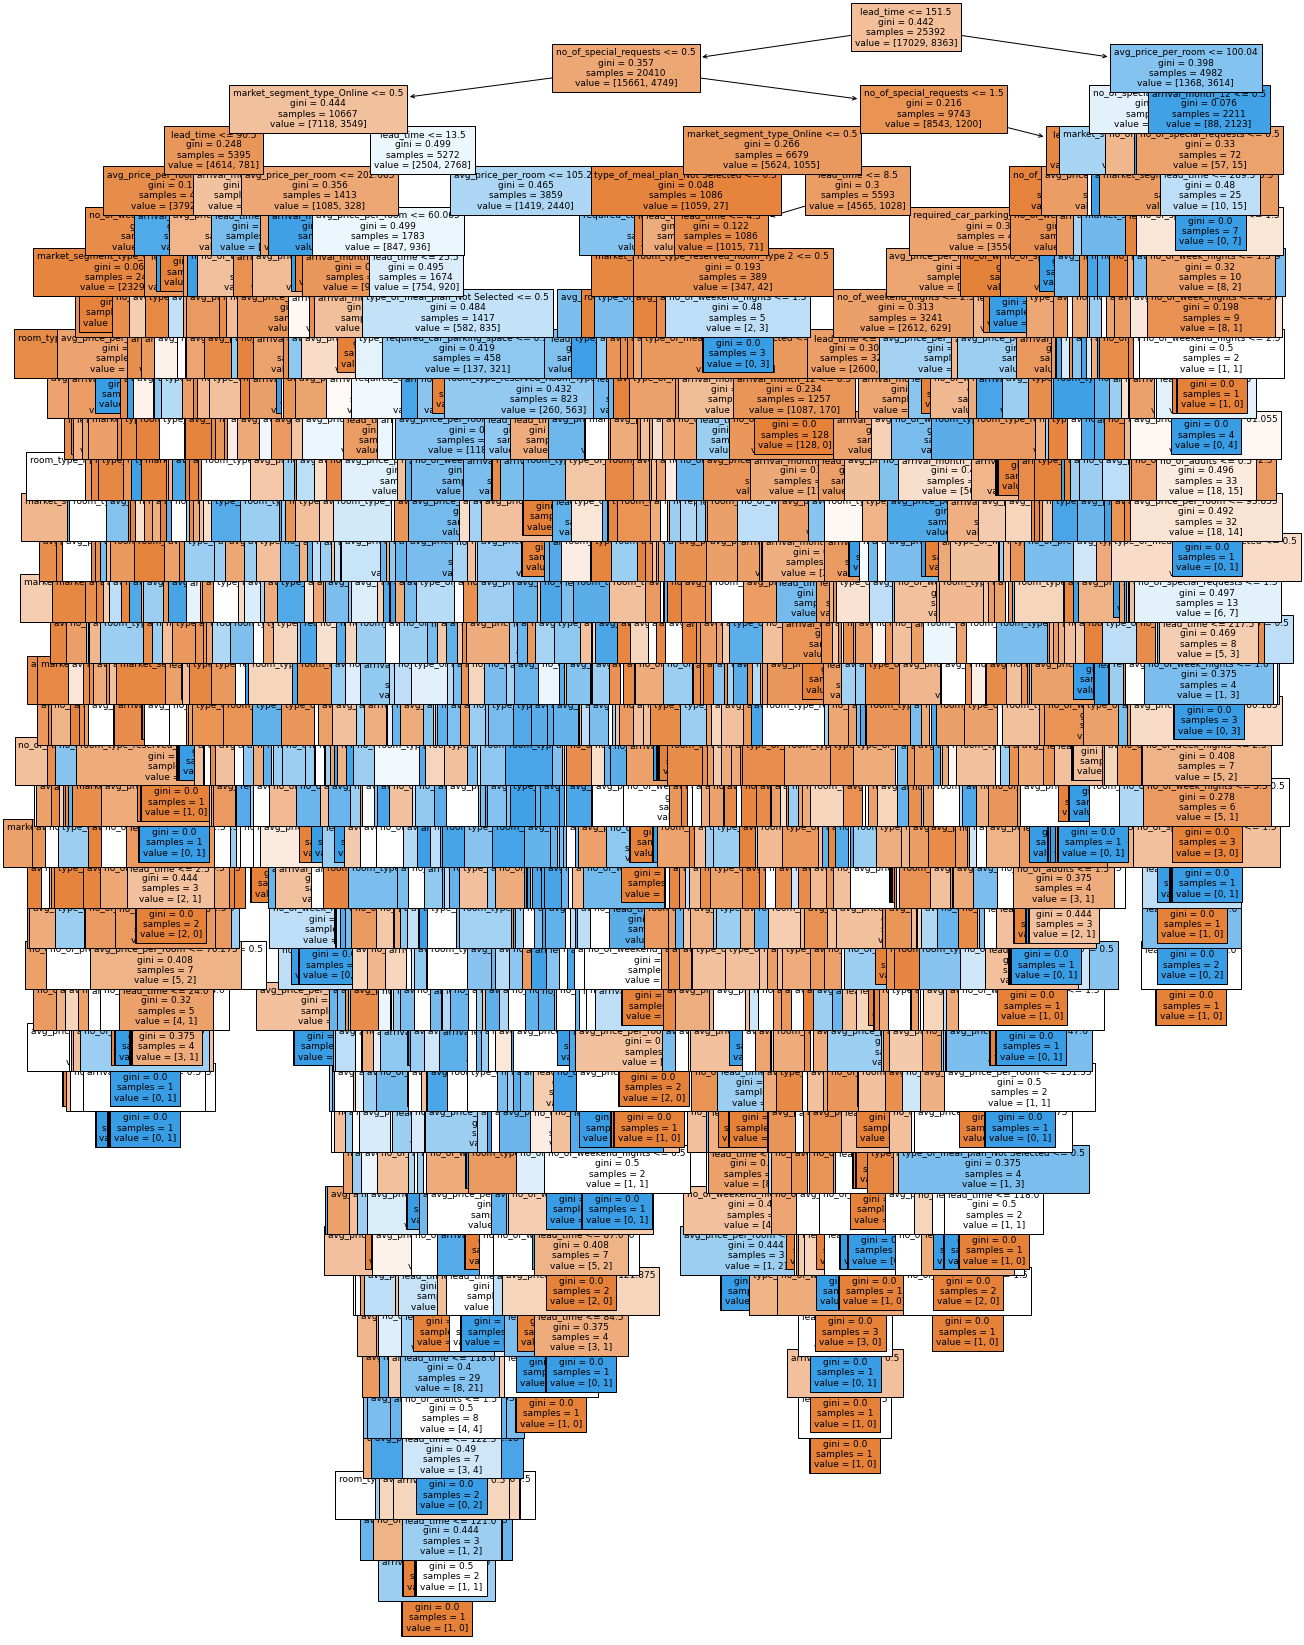

In [107]:
#plotting the decision tree
plt.figure(figsize=(20,30))

out = tree.plot_tree(
    dTree, feature_names=feature_names,
    filled=True, 
    fontsize=9,
    node_ids=False,
    class_names=None)

#adding arrows to the decision tree split if they are missing:
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [108]:
#test report of decision tree before pruning
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

- The tree as-is is very complex and difficult to interpet. 

In [109]:
#gini importance values
print(pd.DataFrame(dTree.feature_importances_, columns=["Imp"], 
                  index = X_train.columns).sort_values(by="Imp", ascending=False))

                                           Imp
lead_time                             0.382184
avg_price_per_room                    0.194153
market_segment_type_Online            0.095011
no_of_special_requests                0.068044
no_of_week_nights                     0.055217
no_of_weekend_nights                  0.040855
no_of_adults                          0.025810
arrival_month_12                      0.021871
arrival_month_4                       0.012554
type_of_meal_plan_Not Selected        0.009262
room_type_reserved_Room_Type 4        0.007991
arrival_month_7                       0.007748
arrival_month_11                      0.007609
arrival_month_10                      0.007543
required_car_parking_space            0.007406
no_of_children                        0.007262
arrival_month_8                       0.006691
arrival_month_5                       0.006591
arrival_month_3                       0.006559
arrival_month_6                       0.006107
type_of_meal_

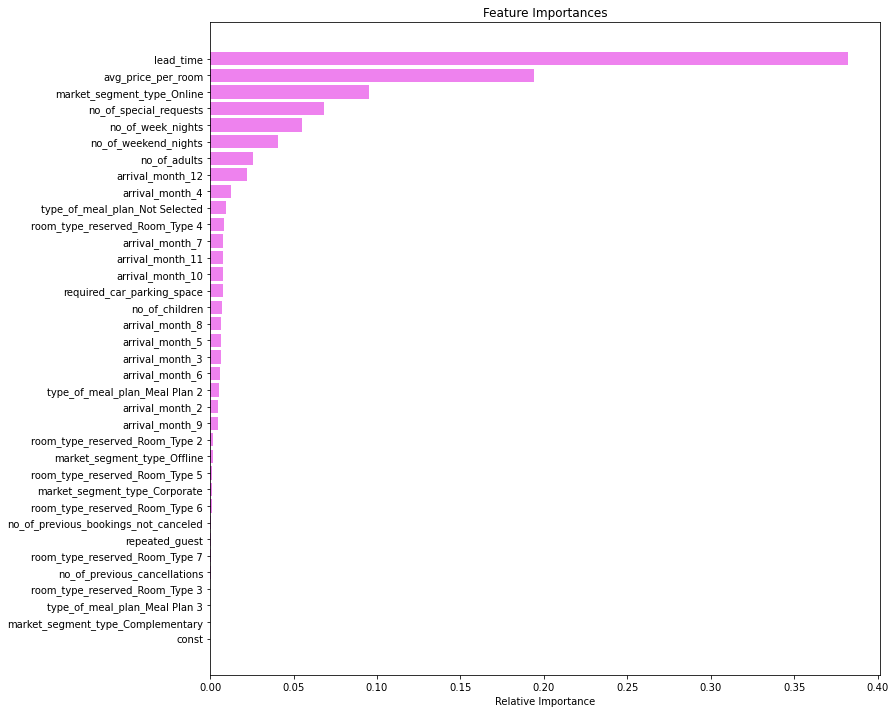

In [110]:
#making a figure of imporance values in order to visualize them 
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- According to the decision tree as-is, lead_time is the most important variable for predicting booking_status. 

## Reducing overfitting by pruning the tree
### Pre-pruning

GridSearch will be used for hyperparameter tuning of the tree model.

In [111]:
#choosing the type of classifier
#classes will be set to "balanced" to avoid any weight bias
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

#parameters to choose from:
parameters = {"max_depth": np.arange(1,10),
             "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20], 
             "max_leaf_nodes": [2, 3, 5, 10], 
             "min_impurity_decrease": [0.001, 0.01, 0.1]}

#type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#running the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#fits the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

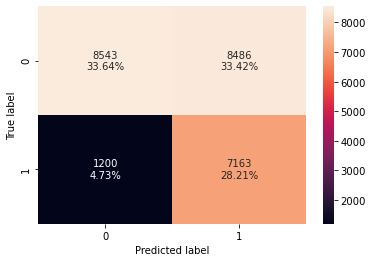

In [112]:
#checking performance on training set
confusion_dtrees(estimator, X_train, y_train)

In [113]:
decision_tree_tune_perf_train = mpcsl(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.618541,0.856511,0.457729,0.596618


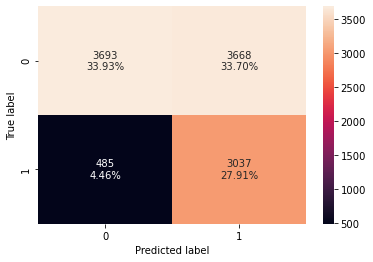

In [114]:
#checking performance on test set
confusion_dtrees(estimator, X_test, y_test)

In [115]:
decision_tree_tune_perf_test = mpcsl(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.618396,0.862294,0.452946,0.593918


- The model is giving a more generalized result now. Results are more consistent between training and test sets. 

## Visualizing the decision tree - with pre-pruning

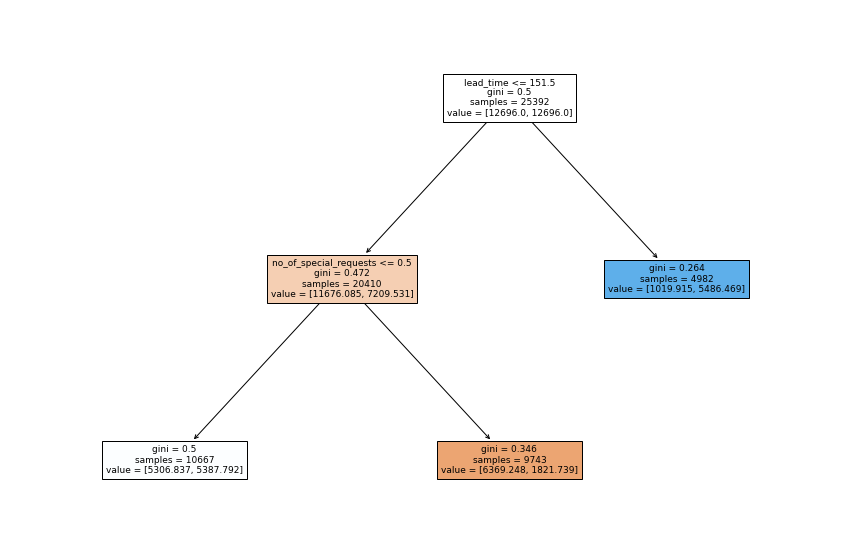

In [116]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [117]:
# text report of tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- weights: [1019.91, 5486.47] class: 1



In [118]:
#gini importance values
print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], 
                  index = X_train.columns).sort_values(by="Imp", ascending=False))

                                           Imp
lead_time                             0.737291
no_of_special_requests                0.262709
const                                 0.000000
arrival_month_8                       0.000000
arrival_month_2                       0.000000
arrival_month_3                       0.000000
arrival_month_4                       0.000000
arrival_month_5                       0.000000
arrival_month_6                       0.000000
arrival_month_7                       0.000000
arrival_month_9                       0.000000
room_type_reserved_Room_Type 6        0.000000
arrival_month_10                      0.000000
arrival_month_11                      0.000000
arrival_month_12                      0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 5        0.000000
no_of_adults 

- The importance of 2 features has increased with pre-pruning. 

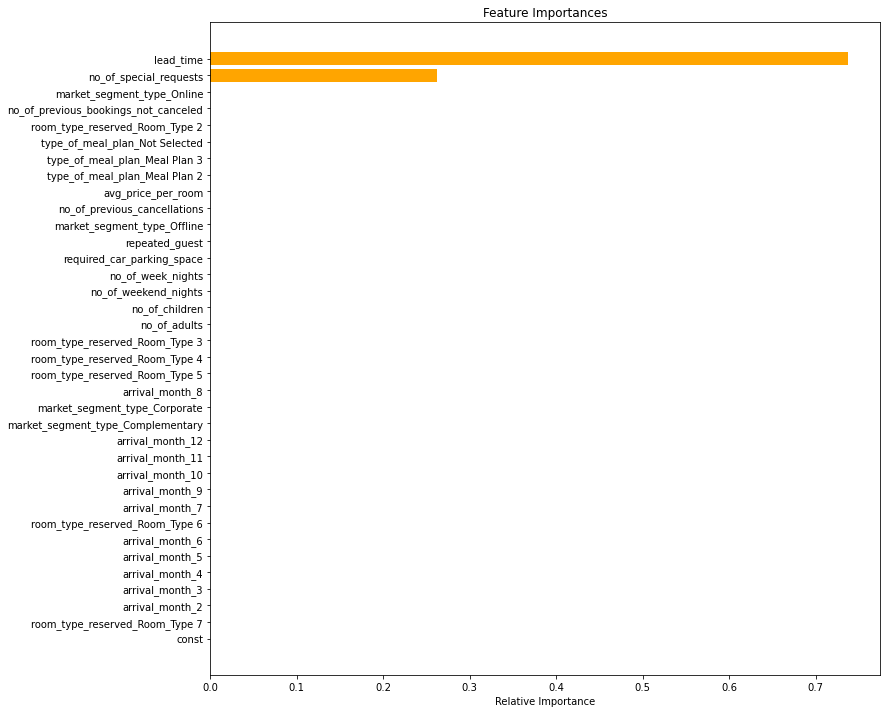

In [119]:
# visualizing importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- With this model, lead_time and no_of_special_requests are the only 2 important features. 

### Cost-complexity pruning
- Parameterized by the cost complexity parameter (ccp_alpha). 
- The nodes with the smallest effective alpha are pruned first. 

In [120]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [121]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.009130
1,2.933821e-20,0.009130
2,2.933821e-20,0.009130
3,2.933821e-20,0.009130
4,2.933821e-20,0.009130
...,...,...
1967,8.901596e-03,0.328058
1968,9.802243e-03,0.337860
1969,1.271875e-02,0.350579
1970,3.412090e-02,0.418821


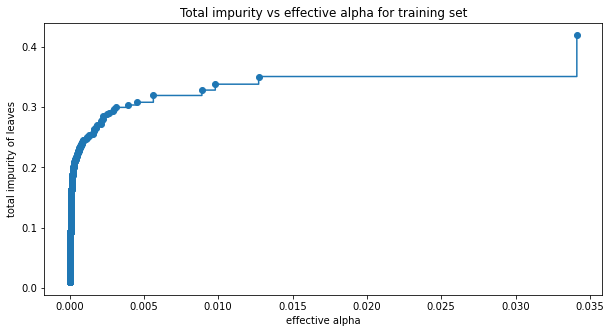

In [122]:
# plotting total impurity vs effective alpha - training set
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs effective alpha for training set")
plt.show()

- The last value in ccp_alphas is the alpha value that will be used to prune the whole tree. This will leave the tree clfs[-1] with one node.

In [123]:
clfs = []
for ccp_alpha in ccp_alphas: 
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alphas: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alphas: 0.0811791438913696


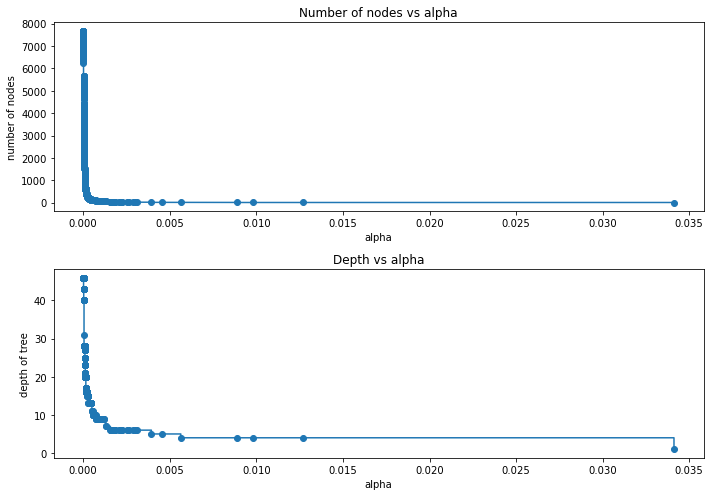

In [124]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

<b> Since F1 score is our optimal metric for our data, we want our decision tree to maximize this. </b>

In [125]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [126]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

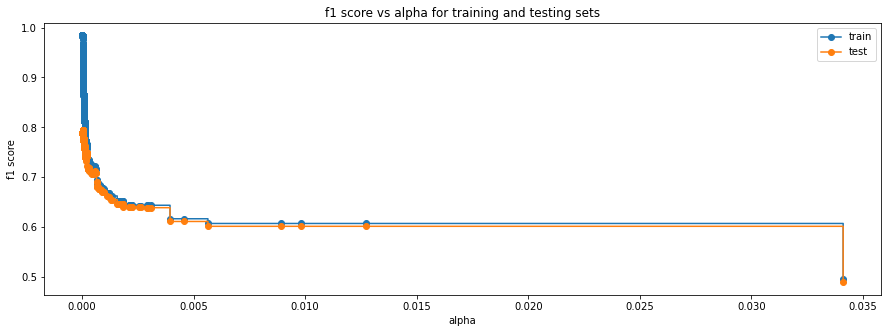

In [127]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1 score")
ax.set_title("f1 score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker = "o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, f1_test, marker = "o", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [128]:
#creating the model where we get highest train and test f1 scores
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.628072887225774e-05,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


### Checking the performance of the best_model - post-pruning

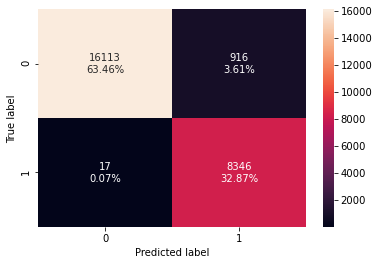

In [129]:
#confusion matrix - best_model on training set
confusion_dtrees(best_model, X_train, y_train)

In [130]:
decision_tree_post_perf_train = mpcsl(best_model, X_train, y_train)
print("Training set:")
decision_tree_post_perf_train

Training set:


,Accuracy,Recall,Precision,F1
0,0.963256,0.997967,0.901101,0.947064


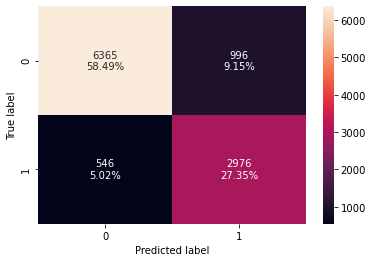

In [131]:
#confusion matrix - best_model on test set
confusion_dtrees(best_model, X_test, y_test)

In [132]:
decision_tree_post_perf_test = mpcsl(best_model, X_test, y_test)
print("Test set:")
decision_tree_post_perf_test

Test set:


,Accuracy,Recall,Precision,F1
0,0.858311,0.844974,0.749245,0.794235


- Interestingly, with post-pruning, the f1 score of the training set is much higher compared to to the test set and the two values are not comparable. 
    - The model is very overfit to the training set and does not perform well on the test set. 

### Visualizing the best_model tree 

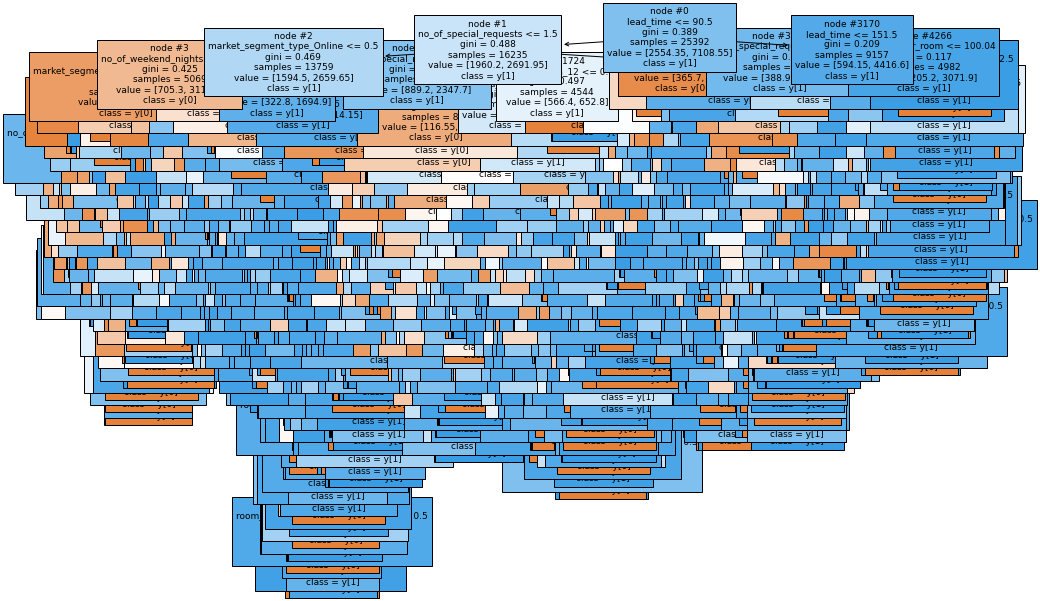

In [133]:
plt.figure(figsize = (15,10))
tree.plot_tree(best_model, feature_names = feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [134]:
# text report of the model
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 199.01
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 92.50
|   |   |   |   |   |   |   |   |--- weights: [25.65, 0.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  92.50
|   |   |   |   |   |   |   |   |--- no_of_week_nights <= 1.50
|   |   |   |   |   |   |   |   |   |--- no_of_previous_bookings_not_canceled <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 8.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  8.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.40] class: 1
|   |   |   |   |   |   |   |   |   |--- 

- The best_model tree is still very complex and difficult to interpret. Because of this, our model with post-pruning applied is very overfit to the training set and does not perform well on the test set. 
- Below is a comparison of the three tree models on the training set and test set. 

## Model Performance Comparisons

In [135]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn - Train",
    "Decision Tree (Pre-Pruning) - Train",
    "Decision Tree (Post-Pruning) - Train",
]

In [136]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn - Test",
    "Decision Tree (Pre-Pruning) - Test",
    "Decision Tree (Post-Pruning) - Test",
]

In [137]:
display(models_train_comp_df, models_test_comp_df)

,Decision Tree sklearn - Train,Decision Tree (Pre-Pruning) - Train,Decision Tree (Post-Pruning) - Train
Accuracy,0.993541,0.618541,0.963256
Recall,0.984694,0.856511,0.997967
Precision,0.995647,0.457729,0.901101
F1,0.990141,0.596618,0.947064


,Decision Tree sklearn - Test,Decision Tree (Pre-Pruning) - Test,Decision Tree (Post-Pruning) - Test
Accuracy,0.864651,0.618396,0.858311
Recall,0.799262,0.862294,0.844974
Precision,0.786093,0.452946,0.749245
F1,0.792623,0.593918,0.794235


- When comparing the performance metrics of all 3 models on the training set and the test set, there are a few interesting observations: 
    - The non-treated/non-pruned initial model fits the training data very well. All of the metrics are very high. When this model is applied to the test set, the performance drops and the model does not do a great job of explaining the test data. 
    - The pre-pruned tree has lower initial performance metrics compared to the non-pruned model. All of the metrics are doing an okay job of explaining the training data. Interestingly, when this model is applied to the test set, the metrics do not drastically change. This indicates that the pre-pruned model is not overfitting the training data and is explaining BOTH the training data and test data well. 
    - The post-pruned tree has very high performance metric values when applied to the training data and is doing a great job of explaining it. However, once this model is applied to the test set, the metrics drop. This shows that the model is overfit to the training data and is not doing a good job of explaining the test set. 
- Because of the consistency of the performance metrics between the training data and the test data, we will go forward with using the <b>pre-pruned tree</b>. Even though the performance metrics are not as high as the other models, the data is better explained throughout both groups. 

# Final Decision Tree Model 

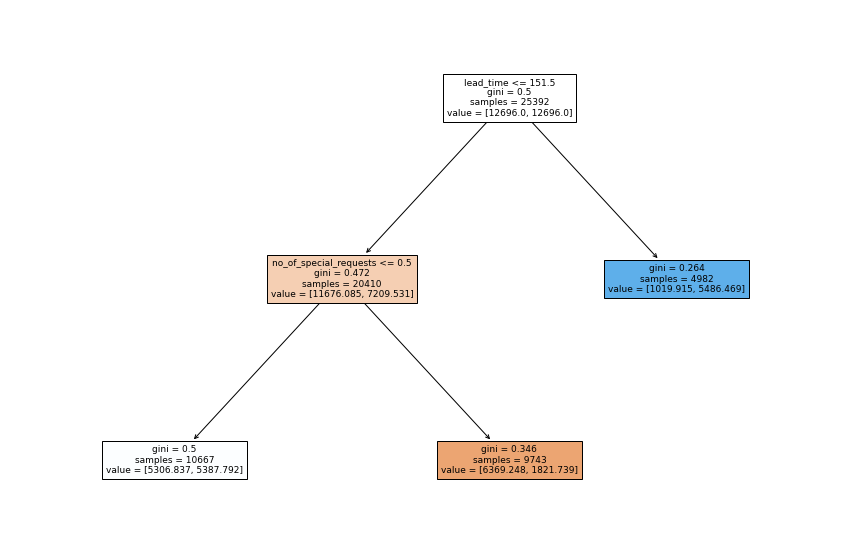

In [138]:
#visualizing the tree 

plt.figure(figsize=(15, 10))
out = tree.plot_tree(estimator, feature_names=feature_names, filled=True, fontsize=9, 
                     node_ids=False, class_names=None)

plt.show()

In [139]:
# text report of tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- weights: [1019.91, 5486.47] class: 1



In [140]:
#gini importance values
print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], 
                  index = X_train.columns).sort_values(by="Imp", ascending=False))

                                           Imp
lead_time                             0.737291
no_of_special_requests                0.262709
const                                 0.000000
arrival_month_8                       0.000000
arrival_month_2                       0.000000
arrival_month_3                       0.000000
arrival_month_4                       0.000000
arrival_month_5                       0.000000
arrival_month_6                       0.000000
arrival_month_7                       0.000000
arrival_month_9                       0.000000
room_type_reserved_Room_Type 6        0.000000
arrival_month_10                      0.000000
arrival_month_11                      0.000000
arrival_month_12                      0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 5        0.000000
no_of_adults 

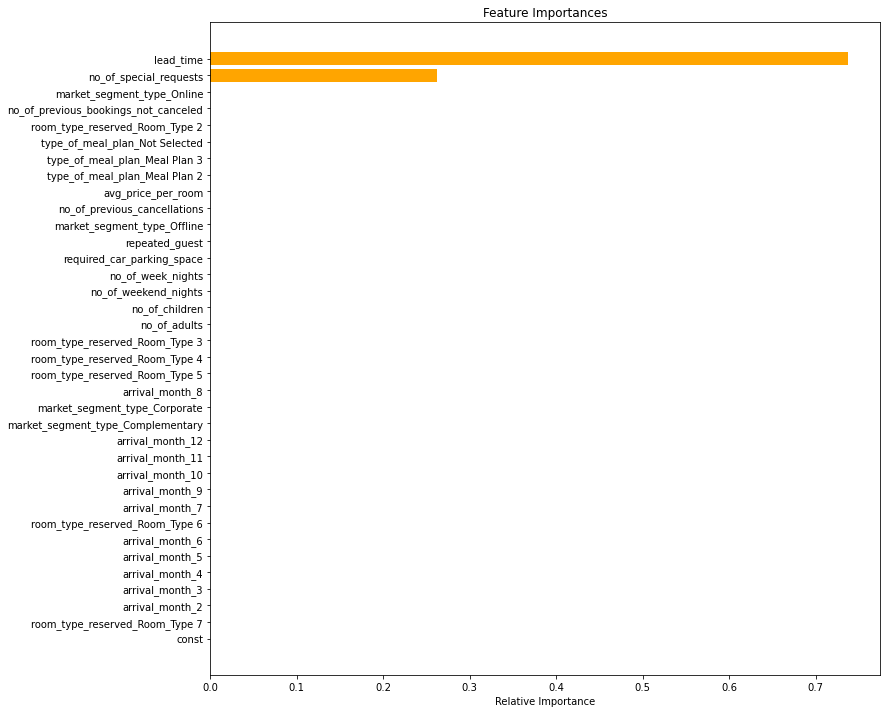

In [141]:
# visualizing importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- With this model, lead_time and no_of_special_requests are the only variables that make important impacts on the likelihood of a customer cancelling or not. 

# Decision tree conclusions
- According to the decision tree model:
    - If a customer has a lead time of greater than 151 days, they are more likely to cancel compared to those with shorter lead times (less than 151 days). 
    - If a customer has a short lead time (less than 151 days), then their likelihood of cancelling comes down to the number of special requests they have on their booking. 
        - They are more likely to cancel if they have less than 0.5 special requests (so, if they have 0 special requests). 
        - The customer is not as likely to cancel if they have multiple special requests. 

# Actionable Insights and Recommendations
- It seems that lead_time plays a significant role in helping the hotel predict if the customer will cancel or not. This could potentially be because some people may book a hotel very far in advance even though they have not fully committed to even traveling yet. The farther in advance they book the hotel, the more time a customer may have to change their mind, make different plans, decided they can no longer afford to travel that week, have the person they are traveling with back out, etc. It is more likely that something will come up that will cause the customer to cancel on long-lead-time bookings compared to bookings that are only a few days/weeks in advance. 
- Second to lead time, the number of special requests that are made also plays a big role in the likelihood of the customer cancelling. This is likely because if a customer has special requests, they are taking the time to customize their booking. This could mean they are more serious about their travel plans compared to someone spontaneously booking a hotel in hopes of being able to travel. Hotels that can accommodate multiple requests are seen as more reliable to the customers that need those requests fulfilled. Some customers like this do not have the flexibility to shift their plans if something comes up, which leads them to being less likely to cancel. 

<b>What profitable policies for cancellations and refunds can the hotel adopt?</b>
- It would be in the the hotel's best interest to implement a cancellation fee for last minute cancellations that may not have enough lead time to resell to another potential guest. 
- Since many of the cancellations seen have long lead times, the hotel should ramp up marketing for rooms that were cancelled and have a long enough lead time to capture customers that book more last minute. Last-minute bookings are very commonly seen by this hotel so potentially giving discounts for last minute bookings could lead to more rooms filling up that were previously vacant due to cancellations. 

<b>What other recommedations would you suggest to the hotel?</b>
- Families with many children were seen to have some of the lowest cancellation rates. The hotel should put more effort into marketing to families as they are a reliable category of guests that are less likely to cancel. 
- Many guests at the hotel are first-time guests. We also see that many guests that repeatedly stay at the hotel do not cancel their reservations very often. The hotel should be sure to treat first-time guests well and incentivize them to come back and stay again. This will turn them into repeat guests and as we know, repeat guests tend to keep their reservations. 